In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
merge_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
len(merge_data["Mouse ID"].unique())

249

In [7]:
merge_data['Mouse ID'].value_counts()

g989    13
t198    10
a644    10
c559    10
z578    10
        ..
t573     1
x226     1
f932     1
o848     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
duplicate_mouse_id = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_id = duplicate_mouse_id["Mouse ID"]
print(duplicate_mouse_id)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [9]:
duplicate_mouse = merge_data[merge_data["Mouse ID"].isin(duplicate_mouse_id) == False]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
drug_group = duplicate_mouse.groupby('Drug Regimen')
tumor_drug_group = drug_group["Tumor Volume (mm3)"].count()
tumor_drug_list = tumor_drug_group.values.tolist()

In [11]:
means = drug_group.mean()['Tumor Volume (mm3)']
medians = drug_group.median()["Tumor Volume (mm3)"]
variance = drug_group.var()["Tumor Volume (mm3)"]
stddev = drug_group.std()["Tumor Volume (mm3)"]
sems = drug_group.sem()["Tumor Volume (mm3)"]

summary_table = {"Tumor Volume Mean": means,
                    "Tumor Volume Median": medians,
                    "Tumor Volume Variance": variance,
                    "Tumor Volume Standard Deviation": stddev,
                    "Tumor Volume Standard Error": sems}
summary_df = pd.DataFrame(summary_table)
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
drug_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


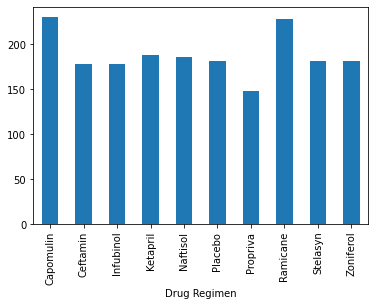

In [13]:
tumor_drug_group.plot.bar()
plt.show()

([<matplotlib.axis.XTick at 0x1ab6a59be20>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

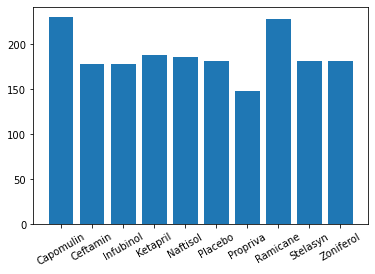

In [14]:
x_axis = np.arange(len(tumor_drug_list))
plt.bar(x_axis,tumor_drug_list,)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation=30)

In [15]:
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])

In [16]:
gender_mouse = duplicate_mouse.groupby("Sex")
gender_group = gender_mouse.count()
gender_group

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


<AxesSubplot:ylabel='Mouse ID'>

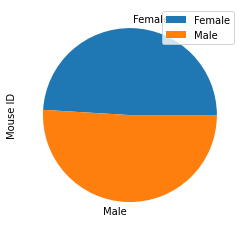

In [17]:
gender_group.plot.pie(y="Mouse ID")

In [18]:
gender_count = gender_group["Mouse ID"].tolist()
gender_count

[922, 958]

([<matplotlib.patches.Wedge at 0x1ab6a69a490>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

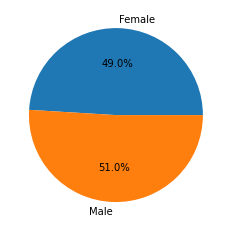

In [19]:
gender = ["Female","Male"]
plt.pie(gender_count,labels=gender,autopct="%1.1f%%")

In [20]:
# Go through duplicate_mouse for greatest timepoint of each mouse
#Group by Drug Regimen
#Pull out Capomulin, Ramicane, Infubinol, and Ceftamin
duplicate_mouse_max = duplicate_mouse.groupby("Mouse ID")
#duplicate_mouse_max_x = duplicate_mouse_max.max()["Timepoint"]
duplicate_mouse_max_x = duplicate_mouse_max["Timepoint"].max()
duplicate_mouse_max_x
#print(type(duplicate_mouse_max_x))

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [21]:
#duplicate_mouse_max_df = duplicate_mouse_max_x.to_frame()
#duplicate_mouse_max_df
duplicate_mouse_max_x = duplicate_mouse_max_x.reset_index()
duplicate_mouse_max_x


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [22]:
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
duplicate_mouse_merge = duplicate_mouse_max_x.merge(duplicate_mouse, on = ["Mouse ID","Timepoint"],how="left")
duplicate_mouse_merge
# print(type(duplicate_mouse_merge['Sex']))

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

In [25]:
for treatment in treatments:
    #.loc for going through drug treatments to get tumor volume
    final_tumor_vol = duplicate_mouse_merge.loc[duplicate_mouse_merge["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    tumor_vol.append(final_tumor_vol)
     
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
#     tumor_vol_ser = pd.Series(tumor_vol)#
    #quartiles = tumor_vol_ser.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'{treatment}s potential outliers: {outliers}')
    #print(final_tumor_vol)
    #print(outliers)
    #print(lower_bound)
    #print(upper_bound)

Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
print(outliers)
# tumor_vol_df = pd.Series(tumor_vol)
 #quartiles = tumor_vol_df.quantile([.25,.5,.75])
 #lowerq = quartiles[0.25]
# upperq = quartiles[.75]
# iqr = upperq-lowerq

Series([], Name: Tumor Volume (mm3), dtype: float64)


In [27]:
print(tumor_vol)

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0      67.973419
1      65.525743
11     57.031862
13     66.0830

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab6a6f5520>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab6a6f5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab6a6f51c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ab6a6fe2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ab6a6fe640>,
 'means': []}

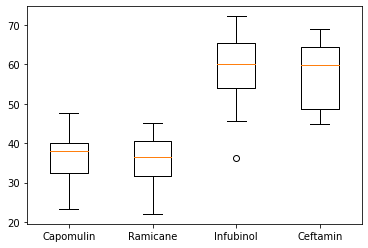

In [28]:
plt.boxplot(tumor_vol,labels=treatments)

In [29]:
#ax.boxplot(tumor_vol)
#plt.show()

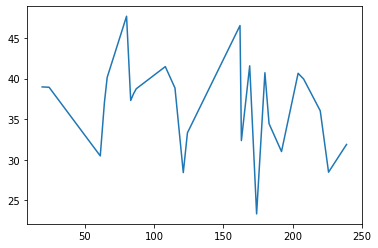

In [30]:
plt.plot(tumor_vol[0])

In [31]:
cap_mice = duplicate_mouse_merge[duplicate_mouse_merge["Drug Regimen"]=="Capomulin"]
cap_mice

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [32]:
cap_mice_drop = cap_mice.drop(columns=["Sex","Age_months","Metastatic Sites","Timepoint","Mouse ID","Drug Regimen"])

In [33]:
cap_mice_drop

,Weight (g),Tumor Volume (mm3)
19,22,38.982878
24,21,38.939633
61,17,30.485985
64,19,37.074024
66,22,40.159220
80,24,47.685963
83,20,37.311846
85,23,38.125164
87,21,38.753265
108,21,41.483008


In [34]:
col = cap_mice_drop.loc[:,"Tumor Volume (mm3)"]
cap_mice_drop["Average Tumor Volume"] = col.mean()

In [35]:
cap_mice_drop

,Weight (g),Tumor Volume (mm3),Average Tumor Volume
19,22,38.982878,36.667568
24,21,38.939633,36.667568
61,17,30.485985,36.667568
64,19,37.074024,36.667568
66,22,40.159220,36.667568
80,24,47.685963,36.667568
83,20,37.311846,36.667568
85,23,38.125164,36.667568
87,21,38.753265,36.667568
108,21,41.483008,36.667568


In [36]:
cap_mice_final = cap_mice_drop.drop(columns=["Tumor Volume (mm3)"])
cap_mice_final

,Weight (g),Average Tumor Volume
19,22,36.667568
24,21,36.667568
61,17,36.667568
64,19,36.667568
66,22,36.667568
80,24,36.667568
83,20,36.667568
85,23,36.667568
87,21,36.667568
108,21,36.667568


Text(0, 0.5, 'Weight(g)')

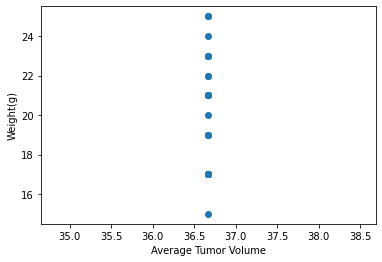

In [37]:
x_values = cap_mice_final["Average Tumor Volume"]
y_values = cap_mice_final["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight(g)")

In [38]:
weight = cap_mice_drop.iloc[:,0]
avg_tumor_vol = cap_mice_drop.iloc[:,1]
correlation = st.pearsonr(weight,avg_tumor_vol)

In [39]:
print(round(correlation[0],2))

0.88
